# Análisis de correlación
![Correlación](correlacion.jpg)

In [1]:
import numpy as np # https://numpy.org/
import pandas as pd # https://pandas.pydata.org/
import seaborn as sns # https://seaborn.pydata.org/
import matplotlib.pyplot as plt # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
%matplotlib inline

In [2]:
df = pd.read_csv('precio_prep_reg.csv', header = 0) # Leer el archivo generado en el notebook de preproceso

In [3]:
df.corr() # Muestra las correlaciones cruzadas de los atributos numéricos

,precio,tasa_crimen,area_resid,cal_aire,num_hab,edad,prof_mil,p_pobreza,n_cam_hos,n_hab_hotel,lluvia_ano,parque,dist_prom,aeropuerto_SI,cuerpo_agua_Lago,cuerpo_agua_Lago y Rio,cuerpo_agua_Rio
precio,1.000000,-0.466527,-0.484754,-0.429300,0.696304,-0.377999,0.505655,-0.740836,0.108880,0.017007,-0.047200,-0.391574,0.249289,0.182867,0.036233,-0.037497,0.071751
tasa_crimen,-0.466527,1.000000,0.660283,0.707587,-0.288784,0.559591,-0.390052,0.608970,-0.004089,0.056570,0.082151,0.638951,-0.586371,-0.134486,-0.025390,0.009076,-0.060099
area_resid,-0.484754,0.660283,1.000000,0.763651,-0.391676,0.644779,-0.383248,0.603800,0.005799,-0.003761,0.055845,0.707635,-0.708022,-0.115401,-0.026590,0.051649,-0.098976
cal_aire,-0.429300,0.707587,0.763651,1.000000,-0.302188,0.731470,-0.188933,0.590879,-0.049553,0.007238,0.091956,0.915544,-0.769247,-0.073903,-0.046393,0.013849,-0.037772
num_hab,0.696304,-0.288784,-0.391676,-0.302188,1.000000,-0.240265,0.355501,-0.613808,0.032009,0.014583,-0.064718,-0.282817,0.205241,0.163774,-0.004195,0.010554,0.046251
edad,-0.377999,0.559591,0.644779,0.731470,-0.240265,1.000000,-0.261515,0.602339,-0.021012,0.013918,0.074684,0.673850,-0.747906,0.005101,0.003452,-0.004354,-0.088609
prof_mil,0.505655,-0.390052,-0.383248,-0.188933,0.355501,-0.261515,1.000000,-0.374044,-0.008056,-0.037007,-0.045928,-0.187004,0.232452,0.069437,0.048717,-0.046981,0.094256
p_pobreza,-0.740836,0.608970,0.603800,0.590879,-0.613808,0.602339,-0.374044,1.000000,-0.066008,0.017036,0.061444,0.552310,-0.496967,-0.095054,0.003197,0.020620,-0.109004
n_cam_hos,0.108880,-0.004089,0.005799,-0.049553,0.032009,-0.021012,-0.008056,-0.066008,1.000000,-0.003130,0.058596,-0.071272,-0.027871,-0.006365,0.042278,0.059482,-0.074148
n_hab_hotel,0.017007,0.056570,-0.003761,0.007238,0.014583,0.013918,-0.037007,0.017036,-0.003130,1.000000,0.014869,0.023757,-0.020700,-0.055338,0.037925,0.014755,-0.064096


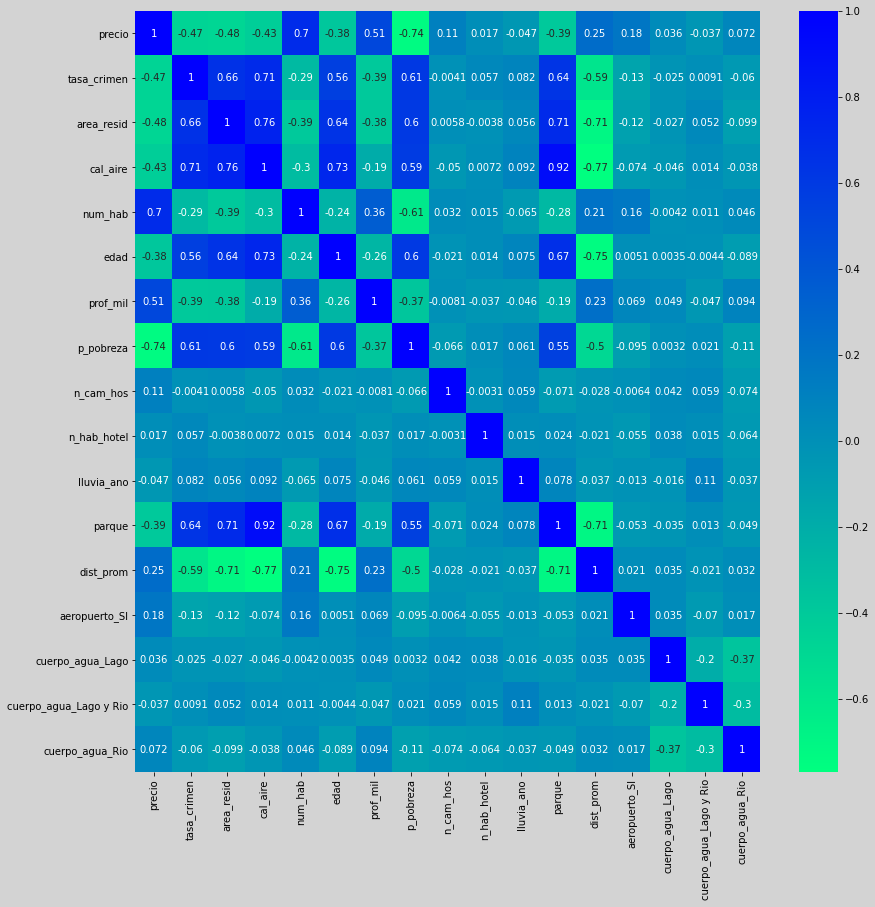

In [4]:
# Se pueden visualizar mejor la correlación entre las variables utilizando un mapa de calor (heatmap)
plt.figure(figsize=(14, 14), facecolor = 'lightgray')
sns.heatmap(df.corr(), annot = True, cmap = 'winter_r')
plt.savefig('mapa.jpg', dpi = 600)

# Regresión lineal simple por el método de los mínimos cuadrados
La regresión lineal simple se caracteriza por tener una sola variable predictora $x$ en el modelo desarrollado, con un termino independiente constante $\theta_{0}$ (intercepción de la recta con el eje $y$), y un peso $\theta_{1}$ asignado a la variable $x$ que es la pendiente de la recta de regresión. Estos valores de $theta$ son los que va a predecir el modelo de regresión simple.

$y=\theta_{0}+\theta_{1}x+\epsilon$

El modelo matricial general es el siguiente para el modelo general de regresión lineal, en el caso de la regresión lineal simple solo existiría una columna para la variable predictora $x$ y solo dos valores de los parámetros $\theta$ ($\theta_{0}$ y $\theta_{1}$.

$Y=
\left[
\begin{array}{40}
y_{1}\\
y_{2})\\
y_{3})\\
y_{3})\\
:\\
y_{m}
\end{array}
\right]
$, $
X=
\left[
\begin{array}{44}
1&x_{1}^1&x_{2}^1&x_{3}^1&...&x_{n}^1\\
1&x_{1}^2&x_{2}^2&x_{3}^2&...&x_{n}^2\\
1&x_{1}^3&x_{2}^3&x_{3}^3&...&x_{n}^3\\
1&x_{1}^4&x_{2}^4&x_{3}^4&...&x_{n}^3\\
:&:&:&:&:&:\\
1&x_{1}^m&x_{2}^m&x_{3}^m&...&x_{n}^m\\
\end{array}
\right]
$ ,
$\theta=
\left[
\begin{array}{40}
\theta_{0}\\
\theta_{1}\\
\theta_{2}\\
\theta_{3}\\
:\\
\theta_{n}
\end{array}
\right]
$

In [5]:
import statsmodels.api as sn # Importar modulo que desarrolla la regresión lineal por el método de los mínimos cuadrados

In [6]:
X = sn.add_constant(df['num_hab']) # Generar constantes iniciales de los parámetros
# theta h(x) = theta0 + theta1 * X

In [7]:
X # Ver las constantes generadas

,const,num_hab
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147
...,...,...
501,1.0,6.593
502,1.0,6.120
503,1.0,6.976
504,1.0,6.794


In [8]:
linear_model = sn.OLS(df['precio'], X).fit() # Crear el modelo y realizar el ajuste de los parámetros

In [9]:
linear_model.summary() # Ver los estadísticos del modelo

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 precio   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Wed, 14 Jul 2021   Prob (F-statistic):           1.31e-74
Time:                        20:57:19   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
num_hab        9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='num_hab', ylabel='precio'>

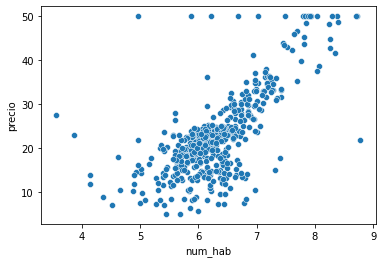

In [10]:
sns.scatterplot(x = df['num_hab'], y = df['precio']) # Visualizar la nube de puntos

<AxesSubplot:xlabel='num_hab', ylabel='num_hab'>

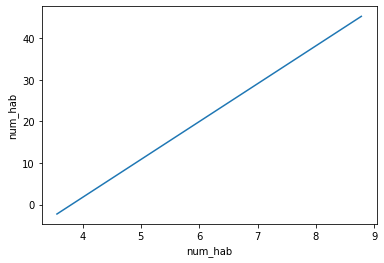

In [11]:
sns.lineplot(x = df['num_hab'], y = -34.6592 + 9.0997*df['num_hab']) # Opción 1: Visualizar la línea de regresión generada
# por el modelo

<AxesSubplot:xlabel='num_hab', ylabel='precio'>

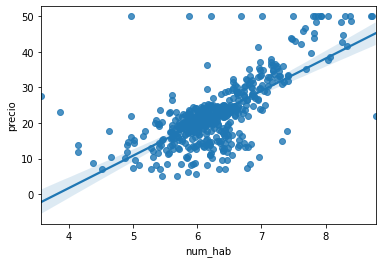

In [12]:
sns.regplot(x = df['num_hab'], y = df['precio']) # Opción 2: Visualizar nube de puntos y línea de regresión
# usando la función regplot

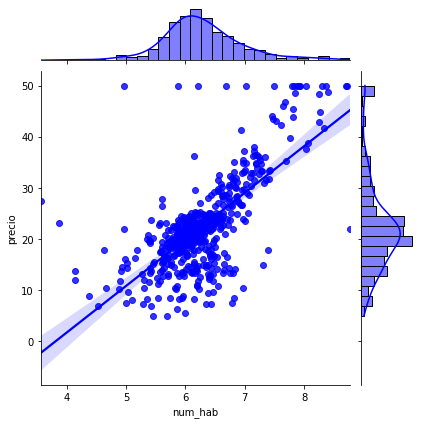

In [13]:
sns.jointplot(x = df['num_hab'], y = df['precio'], kind = 'reg', color = 'blue') # Opción 3: Visualizar la nube de
# puntos y línea de regresión con la función jointplot (kind = 'reg')

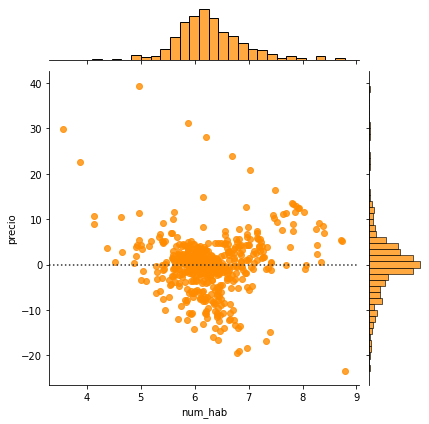

In [14]:
sns.jointplot(x = df['num_hab'], y = df['precio'], kind = 'resid', color = 'darkorange') # Igualmente con la función
# jointplot (kind = 'resid') podemos visualizar los residuos (alturas) de los valores observados vs los predichos

In [15]:
def proyeccion(x):
    y = -34.6592 + 9.0997 * x
    print('El valor proyectado es', '{0:.2f}'.format(y))

In [16]:
proyeccion(10)

El valor proyectado es 56.34


In [17]:
linear_model.predict([1,10])

array([56.33745351])

# Regresión lineal multiple

In [18]:
X_multiple = df.drop('precio', axis = 1) # Crear un nuevo dataframe sin la columna precio (axis=1 -> borra columna)

In [19]:
X_multiple.head() # Verificar

,tasa_crimen,area_resid,cal_aire,num_hab,edad,prof_mil,p_pobreza,n_cam_hos,n_hab_hotel,lluvia_ano,parque,dist_prom,aeropuerto_SI,cuerpo_agua_Lago,cuerpo_agua_Lago y Rio,cuerpo_agua_Rio
0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,1,0,0,1
1,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,0,1,0,0
2,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,0,0,0,0
3,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,1,1,0,0
4,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,0,1,0,0


In [20]:
y_multiple = df['precio']

In [21]:
y_multiple

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    19.0
Name: precio, Length: 506, dtype: float64

In [22]:
X_multiple_constante = sn.add_constant(X_multiple)

In [23]:
X_multiple_constante

,const,tasa_crimen,area_resid,cal_aire,num_hab,edad,prof_mil,p_pobreza,n_cam_hos,n_hab_hotel,lluvia_ano,parque,dist_prom,aeropuerto_SI,cuerpo_agua_Lago,cuerpo_agua_Lago y Rio,cuerpo_agua_Rio
0,1.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,1,0,0,1
1,1.0,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,0,1,0,0
2,1.0,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,0,0,0,0
3,1.0,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,1,1,0,0
4,1.0,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.060747,41.93,0.573,6.593,69.1,19.0,9.67,9.348,12.17920,27,0.056006,2.4775,0,0,1,0
502,1.0,0.044275,41.93,0.573,6.120,76.7,19.0,9.08,6.612,13.16480,20,0.059903,2.2875,1,0,1,0
503,1.0,0.058986,41.93,0.573,6.976,91.0,19.0,5.64,5.478,12.19120,31,0.057572,2.1675,0,0,0,0
504,1.0,0.103991,41.93,0.573,6.794,89.3,19.0,6.48,7.940,15.17600,47,0.060694,2.3900,1,0,0,0


In [24]:
lin_model_mult = sn.OLS(y_multiple, X_multiple_constante).fit()

In [25]:
lin_model_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 precio   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     79.20
Date:                Wed, 14 Jul 2021   Prob (F-statistic):          2.05e-124
Time:                        20:57:21   Log-Likelihood:                -1515.9
No. Observations:                 506   AIC:                             3066.
Df Residuals:                     489   BIC:                             3138.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -7.0084      5.281     -1.327      0.185     -17.385       3.368
tasa_crimen                0.0319      0.349      0.091      0.927      -0.653       0.717
area_resid                -0.0427      0.058     -0.741      0.459      -0.156       0.070
cal_aire                 -20.8547      5.895     -3.538      0.000     -32.437      -9.272
num_hab                    4.0128      0.427      9.409      0.000       3.175       4.851
edad                      -0.0055      0.014     -0.405      0.686      -0.032       0.021
prof_mil                   1.0117      0.122      8.284      0.000       0.772       1.252
p_pobreza                 -0.5791      0.053    -10.989      0.000      -0.683      -0.476
n_cam_hos                  0.3404      0.153      2.232      0.026       0.041       0.640
n_hab_hotel                0.0876      0.082      1.066      0.287      -0.074       0.249
lluvia_ano                 0.0163      0.018      0.915      0.361      -0.019       0.051
parque                    59.1167     51.608      1.146      0.253     -42.283     160.517
dist_prom                 -1.2166      0.189     -6.441      0.000      -1.588      -0.846
aeropuerto_SI              1.1121      0.454      2.447      0.015       0.219       2.005
cuerpo_agua_Lago           0.2594      0.642      0.404      0.686      -1.002       1.520
cuerpo_agua_Lago y Rio    -0.6841      0.714     -0.958      0.338      -2.087       0.718
cuerpo_agua_Rio           -0.2752      0.547     -0.503      0.615      -1.349       0.799
==============================================================================
Omnibus:                      179.224   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              796.825
Skew:                           1.528   Prob(JB):                    9.37e-174
Kurtosis:                       8.334   Cond. No.                     2.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Regresión lineal múltiple con el modulo sklearn

In [26]:
from sklearn.linear_model import LinearRegression # Importar el modulo y la función necesaria pare el modelo de regresión lineal

In [27]:
lin_model_sk = LinearRegression() # Crear el modelo

In [28]:
lin_model_sk.fit(X_multiple, y_multiple) # Ajustar el modelo a los datos

LinearRegression()

In [29]:
lin_model_sk.intercept_, lin_model_sk.coef_ # Ver los valores del intercepto y de los coeficientes

(-7.008433659558342,
 array([ 3.18711520e-02, -4.26679062e-02, -2.08546844e+01,  4.01281976e+00,
        -5.51042760e-03,  1.01168089e+00, -5.79134299e-01,  3.40432813e-01,
         8.76278098e-02,  1.63090790e-02,  5.91167254e+01, -1.21662090e+00,
         1.11207644e+00,  2.59412451e-01, -6.84079711e-01, -2.75176945e-01]))